# Tree Based Models
---------
Understand entropy and gini calculations


From GitHub/Google Drive:..\01 DS ML DL NLP and AI With Python Lab Copy\02 Lab Data\Python\tree_weather.xlsx

1.	What is decision tree?
    - a.	Sequence of if-else questions about individual features
    - b.	Decision-Tree has a hierarchy of nodes.
2.	Node: question or prediction.
3.	Building Blocks of a Decision-Tree are three nodes
    - a.	Root: no parent node, question giving rise to two children nodes.
    - b.	Internal node: one parent node, question giving rise to two children nodes.
    - c.	Leaf: one parent node, no children nodes ==>> ** prediction **
4. Depth: The Number of levels

## 1. Decision Tree for Classification

`Business Problem Statement: `predict whether a tumor is `malignant(cancer)` or `benign(non Cancer)` based on two features the `mean radius of the tumor (radius_mean)` and its `mean number of concave points (concave points_mean)`

### Step 1: Import required Modules

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
DecisionTreeClassifier?

Init signature:
DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : string, optional (default="gini")
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : string, optional (default="best")
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int or None, optional (default=None)
    The maximum depth of the tree. If None, then nodes are expanded unt

### Step 2: Load data 

In [3]:
os.chdir("C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python")
df = pd.read_csv("Wisconsin_Breast_Cancer_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [30]:
X = df[["radius_mean","concave points_mean"]] # data frame
y=df["diagnosis"] # Series

In [31]:
X[15:25]

,radius_mean,concave points_mean
15,14.540,0.07364
16,14.680,0.05259
17,16.130,0.10280
18,19.810,0.09498
19,13.540,0.04781
20,13.080,0.03110
21,9.504,0.02076
22,15.340,0.09756
23,21.160,0.08632
24,16.650,0.09170


In [32]:
y[15:25]

15    M
16    M
17    M
18    M
19    B
20    B
21    B
22    M
23    M
24    M
Name: diagnosis, dtype: object

In [33]:
y = y.replace('M',1) # she is suffering with cancer
y = y.replace('B',0) # she is not suffering with cancer
SEED = 1 # for reproducing

### Step 3: Create training and test sets

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=SEED,
                                                    stratify=y)

In [35]:
print(X_train.shape) # (455, 2)
print(y_train.shape) # (455,)
print(X_test.shape) # (114, 2)
print(y_test.shape) # (114,)

(455, 2)
(455,)
(114, 2)
(114,)


### Step 4: Create DecisionTreeClassifier Model with a maximum depth of 6

In [36]:
dt = DecisionTreeClassifier(max_depth=6,
                            random_state=SEED,
                            criterion='gini')

In [37]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

### Step 5: Predict test set labels using model



In [38]:
y_pred = dt.predict(X_test)

### Step 6: Test the Performance 


In [39]:
# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)

In [40]:
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


In [41]:
print(confusion_matrix(y_test,y_pred))

[[65  7]
 [ 6 36]]


In [42]:
(65+36)/114

0.8859649122807017

# Tree Graph

In [48]:
feature_cols=["radius_mean","concave points_mea"]

In [1]:
# first time running then installbelow pkg

# conda install -c anaconda graphviz
# conda install -c conda-forge python-graphviz
# conda install -c conda-forge pydotplus


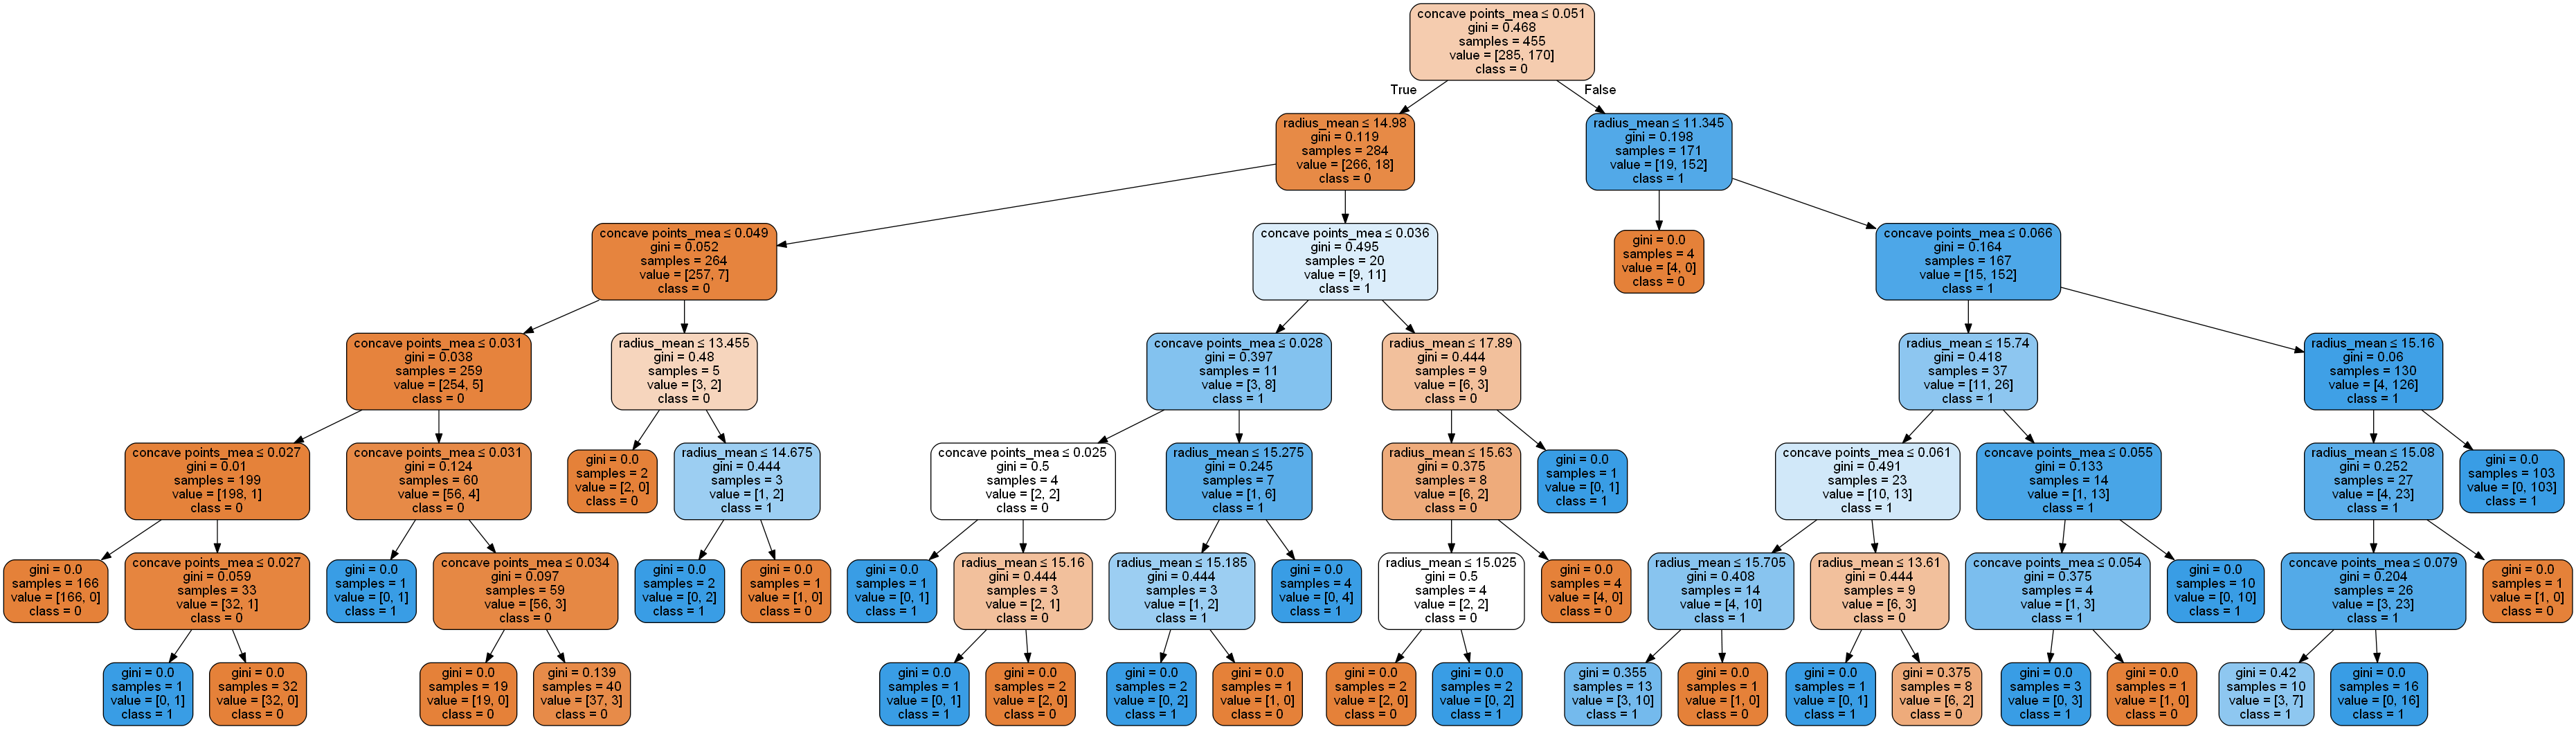

In [49]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


graph.write_png('diabetes.png')
Image(graph.create_png())

> #### Note: Not bad! Using only two features, your tree was able to achieve an accuracy of 89%   :)

# LogisticRegression Vs Decision Tree Classification

In [22]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

In [23]:
# Instatiate logreg
logreg = LogisticRegression(random_state=seed)

In [24]:
# Fit logreg to the training set
logreg.fit(X_train, y_train)

C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# predict
y_pred1 = logreg.predict(X_test)

In [26]:
acc1 = accuracy_score(y_test, y_pred1)
acc1

0.9122807017543859

**By observing accuracies, On this data set which alogorithm is good ?**

<input type="radio" disabled> DT Classifier
<input type="radio" disabled checked> Logistic Regression

> **Home Work :** Similarly apply SVC and KNN on this data set